<a href="https://colab.research.google.com/github/sahay-46/AML/blob/main/2348545_decisionTreePCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Explore PCA  and apply classification techniques  / Regression Techniques

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

Data Preprocessing

In [ ]:
data = pd.read_csv('/content/winequalityN.csv')
data

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
data.isnull().sum().sort_values(ascending = False)

fixed acidity           10
pH                       9
volatile acidity         8
sulphates                4
citric acid              3
residual sugar           2
chlorides                2
type                     0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
alcohol                  0
quality                  0
dtype: int64

Counting the na values of all columns in terms of percentage

In [ ]:
(data.isnull().sum()* 100 / len(data)).round(2).sort_values(ascending = False)

fixed acidity           0.15
pH                      0.14
volatile acidity        0.12
sulphates               0.06
citric acid             0.05
residual sugar          0.03
chlorides               0.03
type                    0.00
free sulfur dioxide     0.00
total sulfur dioxide    0.00
density                 0.00
alcohol                 0.00
quality                 0.00
dtype: float64

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Removing the Duplicates

In [ ]:
without_duplicate = data.drop_duplicates(keep='first').copy()
without_duplicate.head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,white,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
9,white,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6
10,white,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5
11,white,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5
12,white,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5
13,white,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.9912,3.54,0.52,12.4,7


Checking the na percentage after the duplicates are removed

In [ ]:
(without_duplicate.isnull().sum()* 100 / len(without_duplicate)).round(2).sort_values(ascending = False)

fixed acidity           0.19
pH                      0.17
volatile acidity        0.15
sulphates               0.08
citric acid             0.06
residual sugar          0.04
chlorides               0.04
type                    0.00
free sulfur dioxide     0.00
total sulfur dioxide    0.00
density                 0.00
alcohol                 0.00
quality                 0.00
dtype: float64

Visualizing the NA's after removing the duplicate values

<Axes: >

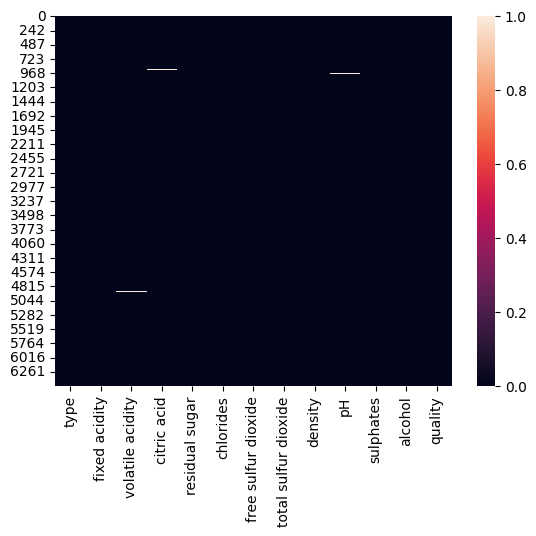

In [ ]:
sns.heatmap(without_duplicate.isnull(), cbar=True)

In [ ]:
without_dup_na = without_duplicate.dropna(how= "any").copy()

In [ ]:
without_dup_na.isnull().values.any()

False

Visualizing the categorical variable after removing duplicates and NAs

Text(0, 0.5, 'Frequency')

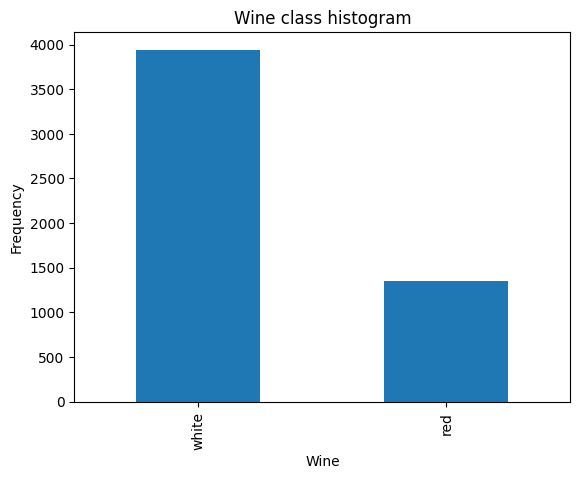

In [ ]:
pd.value_counts(without_dup_na['type']).plot.bar()
plt.title('Wine class histogram')
plt.xlabel('Wine')
plt.ylabel('Frequency')

Preparing the target variable and independent variable

In [ ]:
X = np.array(without_dup_na.iloc[:,without_dup_na.columns != 'type'])
y = np.array(without_dup_na.iloc[:,without_dup_na.columns == 'type'])

print("Shape of X(PREDICTORS): {}".format(X.shape))
print("Shape of y(TARGET): {}".format(y.shape))

Shape of X(PREDICTORS): (5295, 12)
Shape of y(TARGET): (5295, 1)


Splitting training and testing data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10, shuffle=True)

print("Number of X_train dataset: ", X_train.shape)
print("Number of y_train dataset: ", y_train.shape)
print("\nNumber of X_test dataset: ", X_test.shape)
print("Number of y_test dataset: ", y_test.shape)

Number of X_train dataset:  (4236, 12)
Number of y_train dataset:  (4236, 1)

Number of X_test dataset:  (1059, 12)
Number of y_test dataset:  (1059, 1)


Handling unbalanced dataset

In [ ]:
print("Before OverSampling of training dataset, counts of label 'white': {}".format(sum(y_train=="white")))
print("Before OverSampling of training dataset, counts of label 'red': {} \n".format(sum(y_train=="red")))

Before OverSampling of training dataset, counts of label 'white': [3157]
Before OverSampling of training dataset, counts of label 'red': [1079] 



**Inference:** Wine type label red has a lot of samples in the dataset, this may cause the imbalance in the dataset.

Handling Unbalanced dataset by oversampling label red wine


In [ ]:
sm = SMOTE(random_state=10)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X_res: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y_res: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label 'white': {}".format(sum(y_train_res=="white")))
print("After OverSampling, counts of label 'red': {} \n".format(sum(y_train_res=="red")))

After OverSampling, the shape of train_X_res: (6314, 12)
After OverSampling, the shape of train_y_res: (6314,) 

After OverSampling, counts of label 'white': 3157
After OverSampling, counts of label 'red': 3157 



Applying PCA

In [ ]:
pca = PCA(n_components=5)  # Number of components

In [ ]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

Decision Tree Classifier

In [ ]:
# Fit the classifier on the reduced-dimensional training data

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_pca, y_train)


DecisionTreeClassifier(random_state=42)

Predict using the reduced-dimensional test data

In [ ]:
y_pred = clf.predict(X_test_pca)

Model Evaluation

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9376770538243626
Classification Report:
              precision    recall  f1-score   support

         red       0.86      0.90      0.88       274
       white       0.97      0.95      0.96       785

    accuracy                           0.94      1059
   macro avg       0.91      0.93      0.92      1059
weighted avg       0.94      0.94      0.94      1059



**Inference**

The model demonstrates good performance with an accuracy of 94%. Both 'red' and 'white' classes have high precision, recall and f1scores indicating reliable predictions for both classes.

The model performs slightly better in predicting the 'white' class compared to the 'red' class as evident from higher precision, recall and f1 score for 'white'.

Overall the model performs well in distinguishing between 'red' and 'white' wine types based on the given features.